# Github Repo Classification


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

import sys
import os

from main import aggregate_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.testDataImporter import TestDataImporter

## Data Aggregation

In [42]:
importer = TestDataImporter('data/testset.csv')
data = aggregate_data(importer.trainset.repos + importer.testset.repos)
y_data = np.array(importer.trainset.classification + importer.testset.classification)
data[:5]

,repo,up_to_dateness,watcher_count,open_issue_count,forks_count,file_count,avg_entropy,avg_folder_depth,file_folder_ratio,repo_size
0,https://github.com/mpv-player/mpv,5.324161e+03,4640,352,635,628,0.607567,2.250000,9.661538,77453
1,https://github.com/AllThingsSmitty/jquery-tips...,9.972311e+06,3840,3,440,52,0.616400,2.625000,2.080000,252
2,https://github.com/Hengjie/pdf.js,2.915525e+06,0,0,0,1307,0.691902,2.173913,7.064865,59299
3,https://github.com/Nameless13/learngit,9.789647e+05,0,0,0,359,0.598768,5.316667,3.739583,266
4,https://github.com/Kozlov-V/TSMessages,6.216928e+07,0,0,0,376,0.611392,3.784314,4.820513,2012


## Visualizations

we want to compare stuff

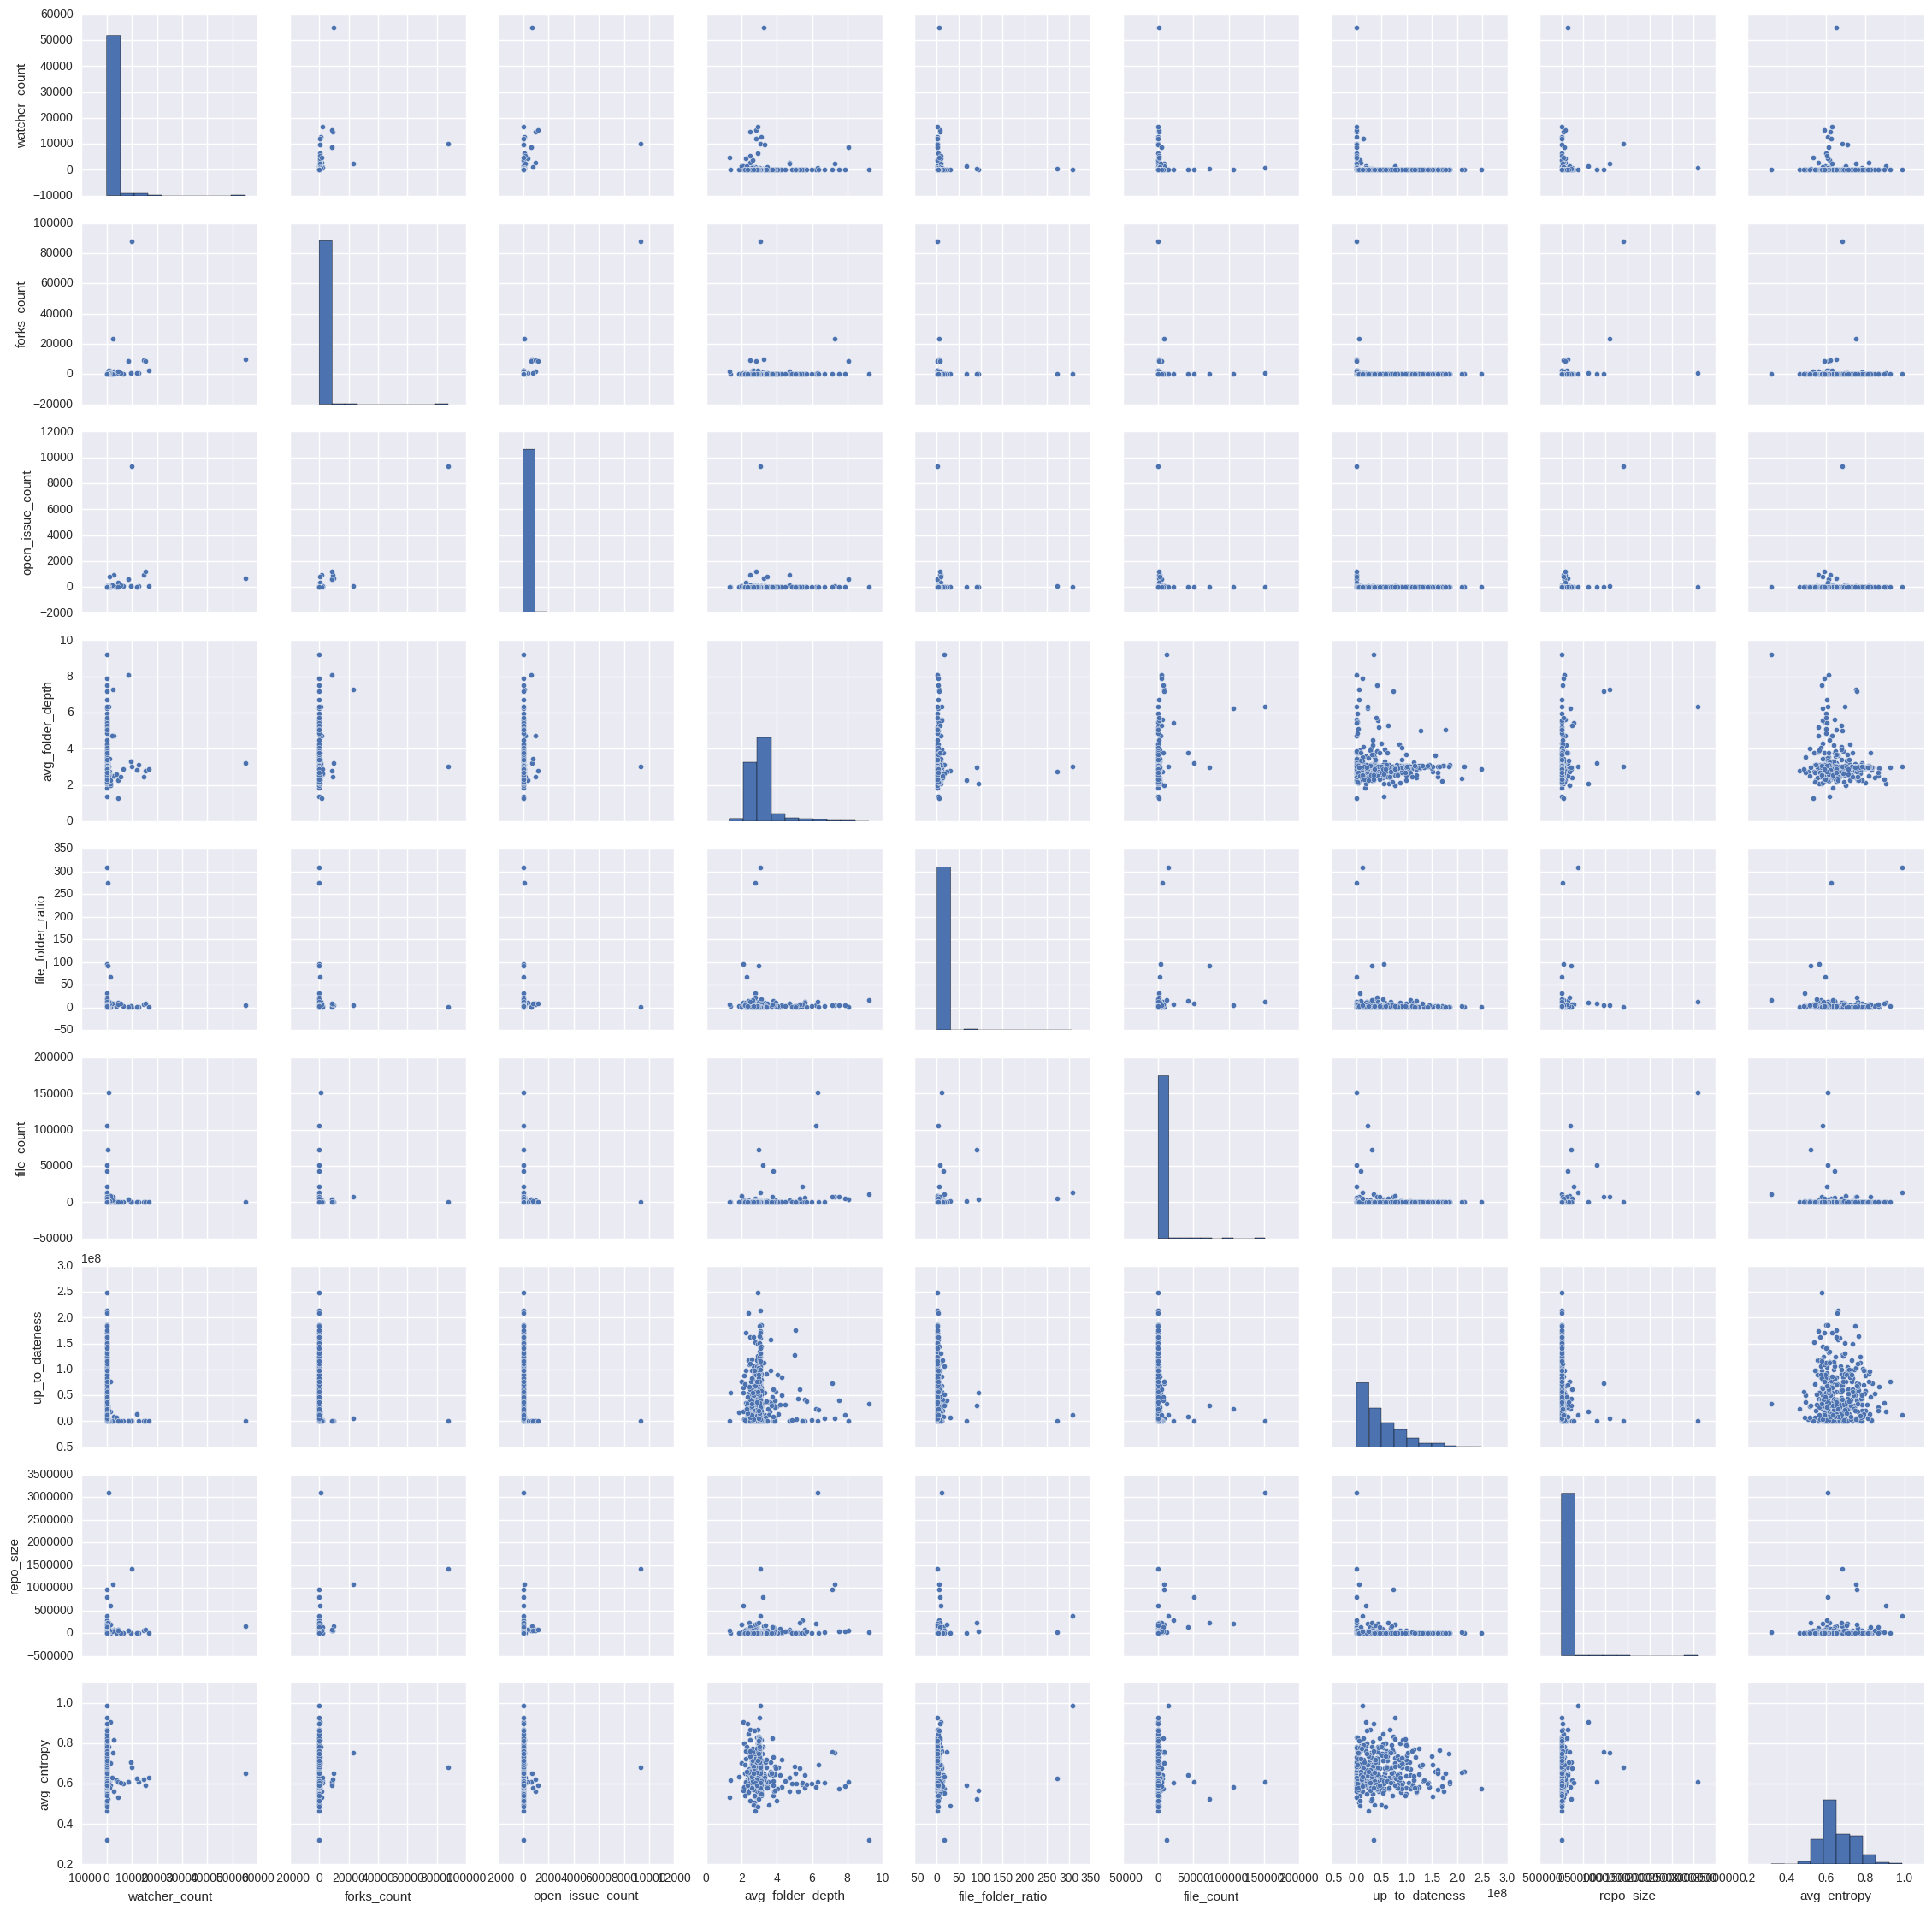

In [3]:
sbn.pairplot(data)

In [23]:
#norm_data = data
#metric_list = list(metricCollection.keys())
#for metric in metric_list:
#    print(data[metric].describe())

In [5]:
data.columns

Index(['repo', 'watcher_count', 'forks_count', 'open_issue_count',
       'avg_folder_depth', 'file_folder_ratio', 'file_count', 'up_to_dateness',
       'repo_size', 'avg_entropy'],
      dtype='object')

In [29]:
# normalize distribution
norm_data = pd.DataFrame()
for metric in metric_list:
    norm_data[metric] = np.log(data[metric] + 1)
    norm_data[metric] = (norm_data[metric] - norm_data[metric].min()) / (norm_data[metric].max() - norm_data[metric].min())

norm_data['avg_entropy'] = data['avg_entropy']
norm_data[:5]

,up_to_dateness,watcher_count,open_issue_count,forks_count,file_count,avg_entropy,avg_folder_depth,file_folder_ratio,repo_size
0,0.026821,0.770764,0.641663,0.566949,0.405086,0.607567,0.233553,0.330773,0.752917
1,0.708447,0.753491,0.151630,0.534790,0.136859,0.616400,0.306594,0.084179,0.370083
2,0.597203,0.000000,0.000000,0.000000,0.484467,0.691902,0.217707,0.275341,0.735055
3,0.498483,0.000000,0.000000,0.000000,0.344582,0.598768,0.678047,0.169776,0.373685
4,0.873993,0.000000,0.000000,0.000000,0.349585,0.611392,0.492200,0.210574,0.508795


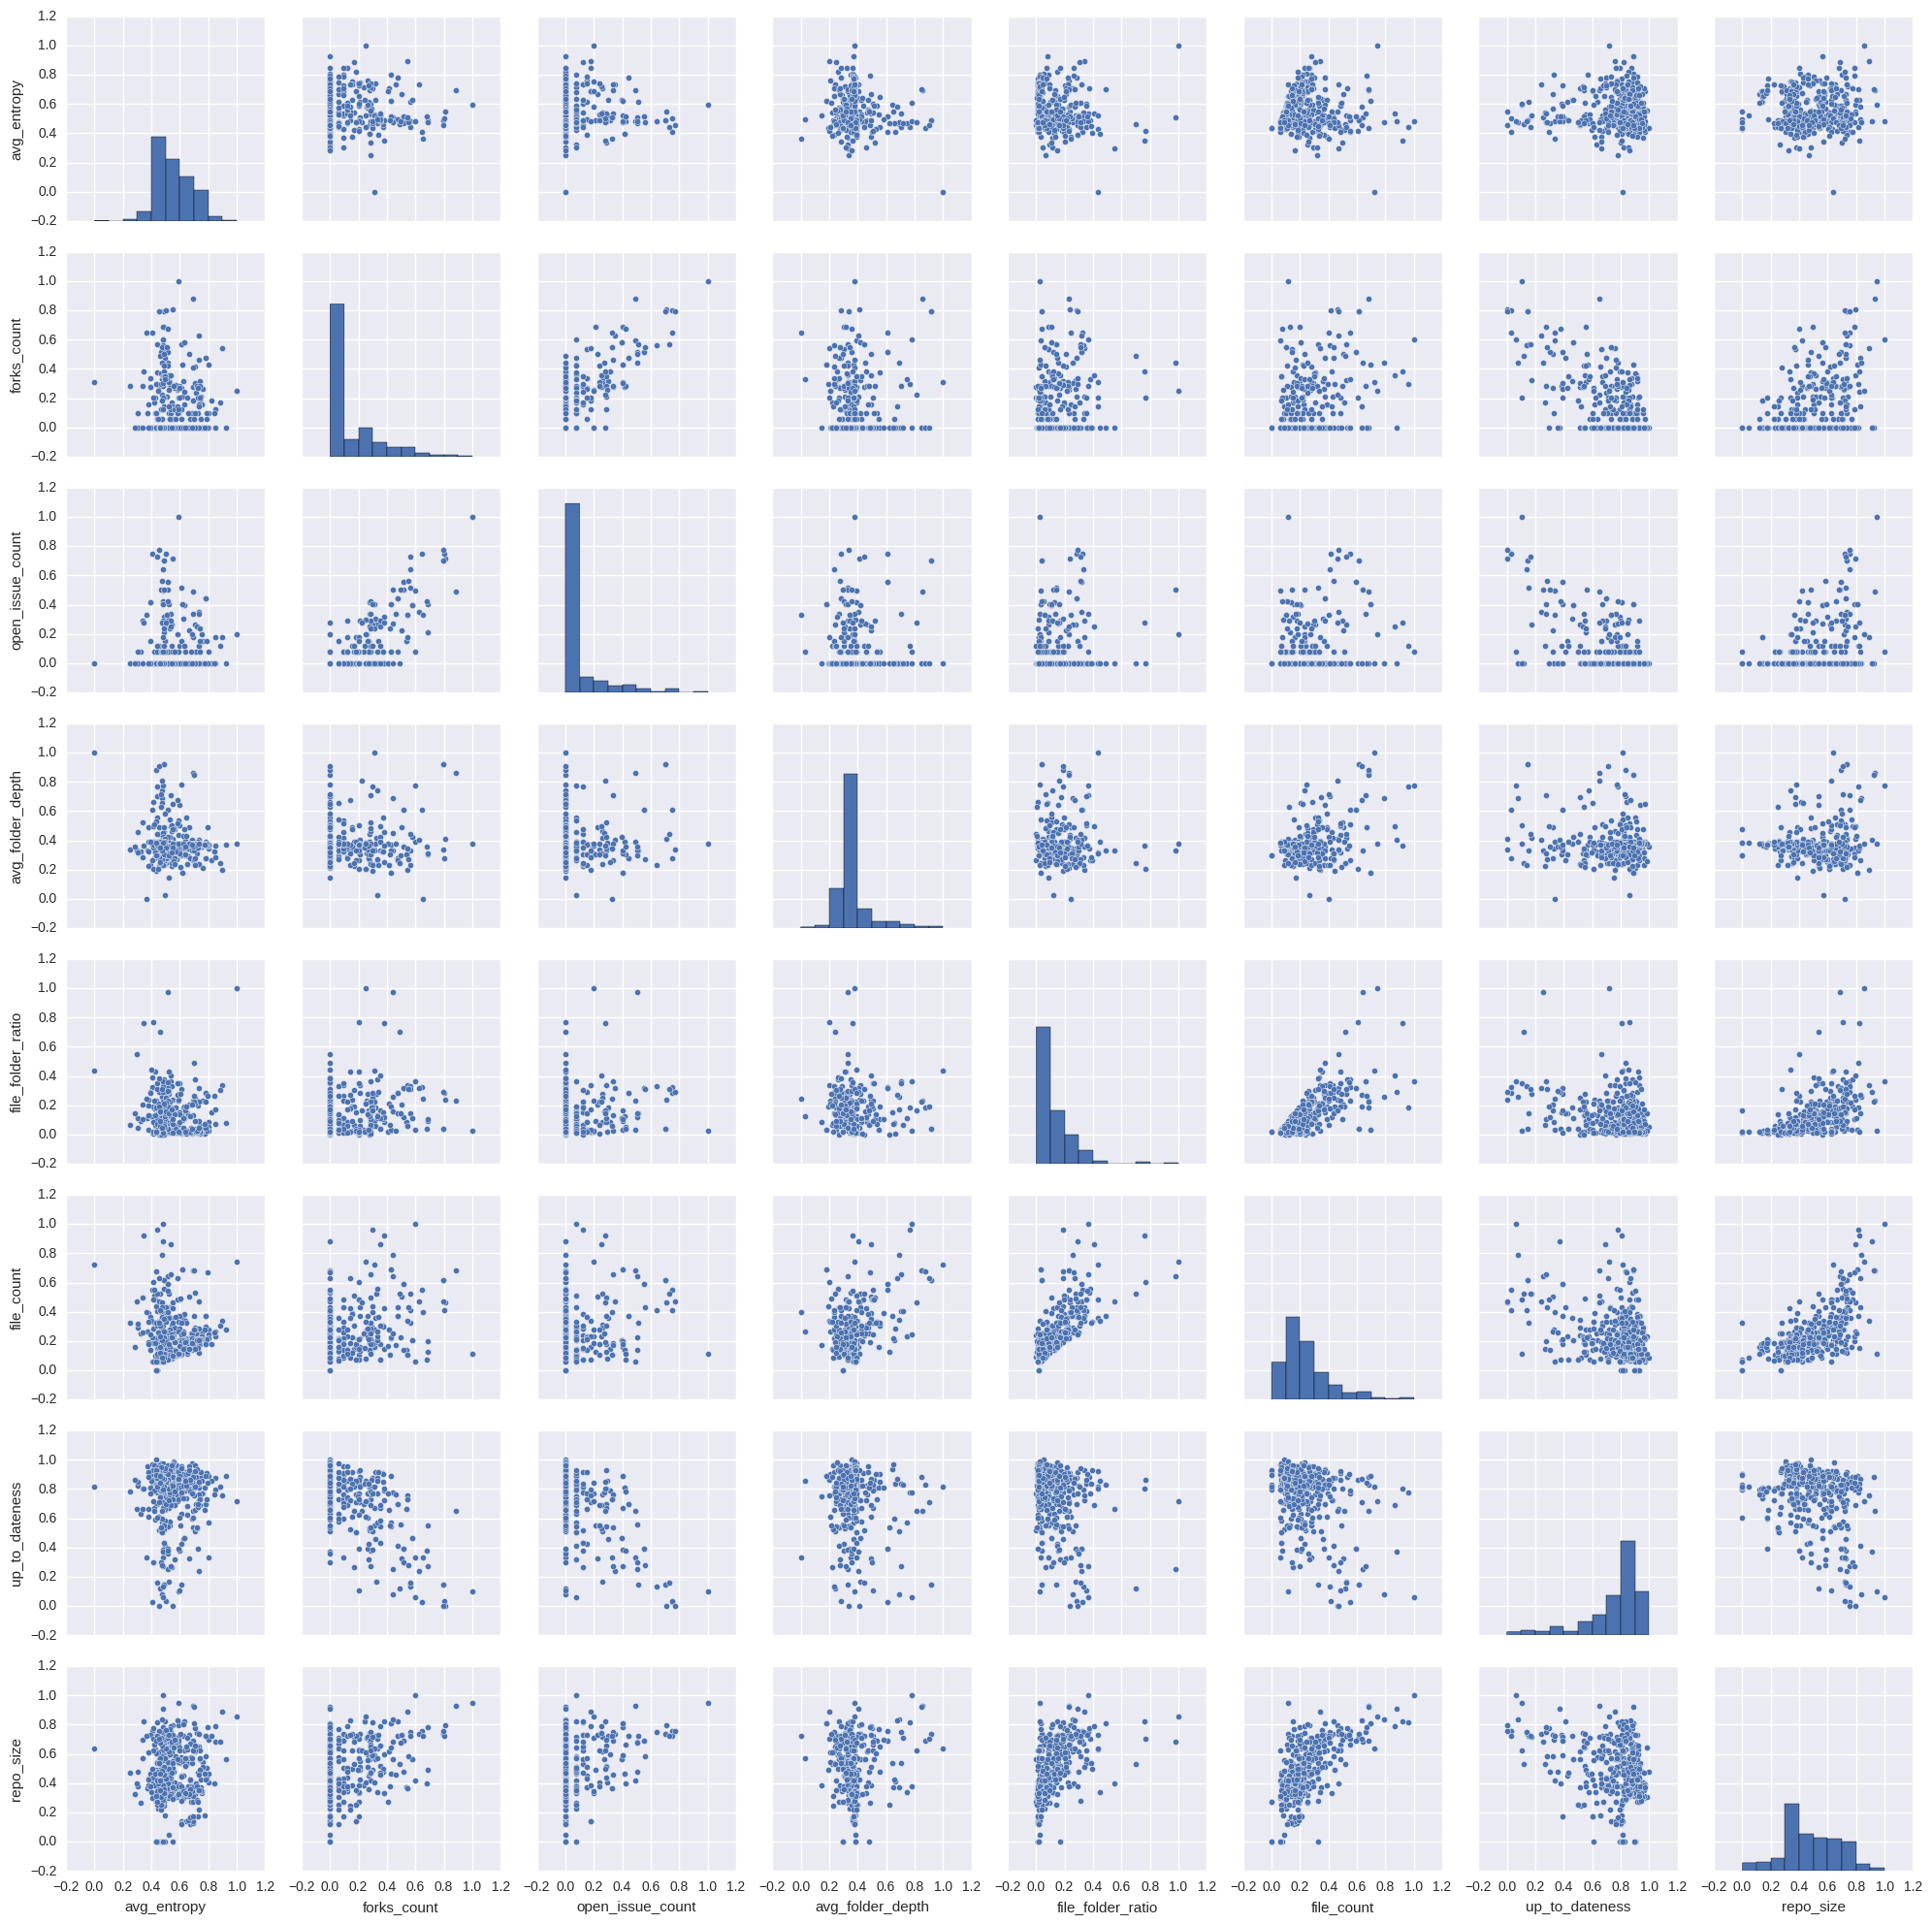

In [7]:
sbn.pairplot(norm_data)

In [38]:
categories = pd.Series(importer.trainset.classification + importer.testset.classification)
categories[norm_data['file_folder_ratio'] > 0.5]
data[norm_data['file_folder_ratio'] > 0.5]
pd.concat([categories[norm_data['file_folder_ratio'] > 0.5], data[norm_data['file_folder_ratio'] > 0.5]], axis=1)


,0,repo,watcher_count,forks_count,open_issue_count,avg_folder_depth,file_folder_ratio,file_count,up_to_dateness,repo_size,avg_entropy
27,DATA,https://github.com/OpenExoplanetCatalogue/open...,375,158,100,2.750000,274.250000,5485,8.127930e+04,27762,0.627787
204,EDU,https://github.com/XQueryInstitute/Course-Mate...,16,9,0,2.107143,95.560976,3918,5.529516e+07,36330,0.564982
244,DOCS,https://github.com/github/dmca,1362,263,0,2.294118,67.923077,1766,1.925997e+04,2858,0.594181
252,DEV,https://github.com/Top-Ranger/bakery,0,0,0,2.772727,31.277778,1126,6.655649e+06,371,0.492096
326,DATA,https://github.com/tategallery/collection,317,77,12,2.962677,91.661209,72779,2.999242e+07,221119,0.522215
334,DATA,https://github.com/recalbox/recalbox-gamelists,18,16,5,3.043478,308.777778,13895,1.187605e+07,373046,0.988245


In [19]:
#fig = plt.figure(figsize=(16,8))
def bar_plots(data):
    f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

    index = np.arange(len(data))
    for i, metric in enumerate(metricCollection):
        ax = axarr[i]
        ax.bar(index,
            data[metric],
            0.7, # barwdith
            label=metric
        )
        ax.set_title(metric)

    plt.xticks(index + 0.35, index)
    None

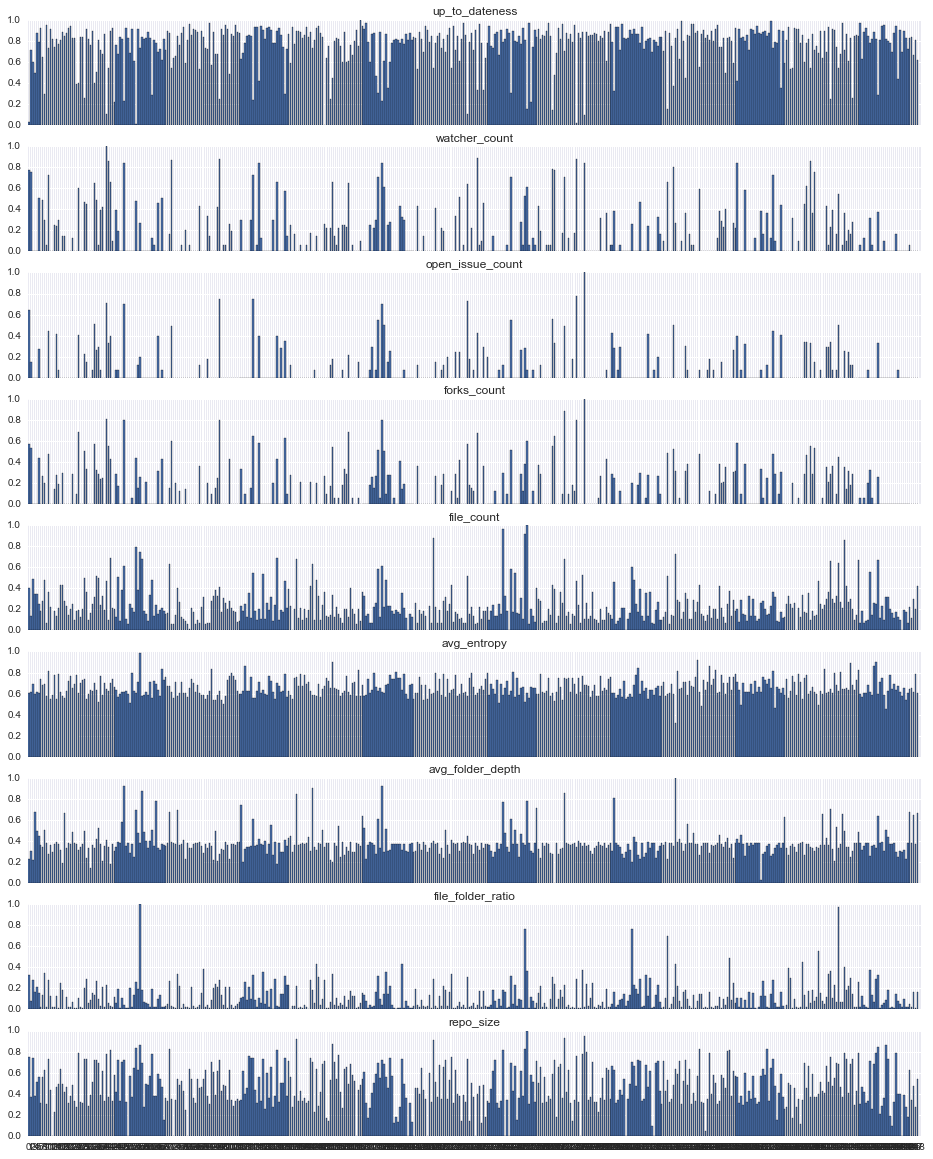

In [30]:
bar_plots(norm_data)

In [53]:
def boxplots(data):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
    for i, metric in enumerate(metric_list):
        x = i % 3
        y = int(i / 3.0)
        data_per_metric = data[metric]
        
        classes = np.unique(y_data)
        data_per_class = []
        for cls in classes:
            data_per_class.append(data_per_metric[y_data == cls])
        
        axes[y, x].boxplot(data_per_class, labels=classes)
        axes[y, x].set_title(metric)
        axes[y, x].set_ylim([-0.2, 1.1])

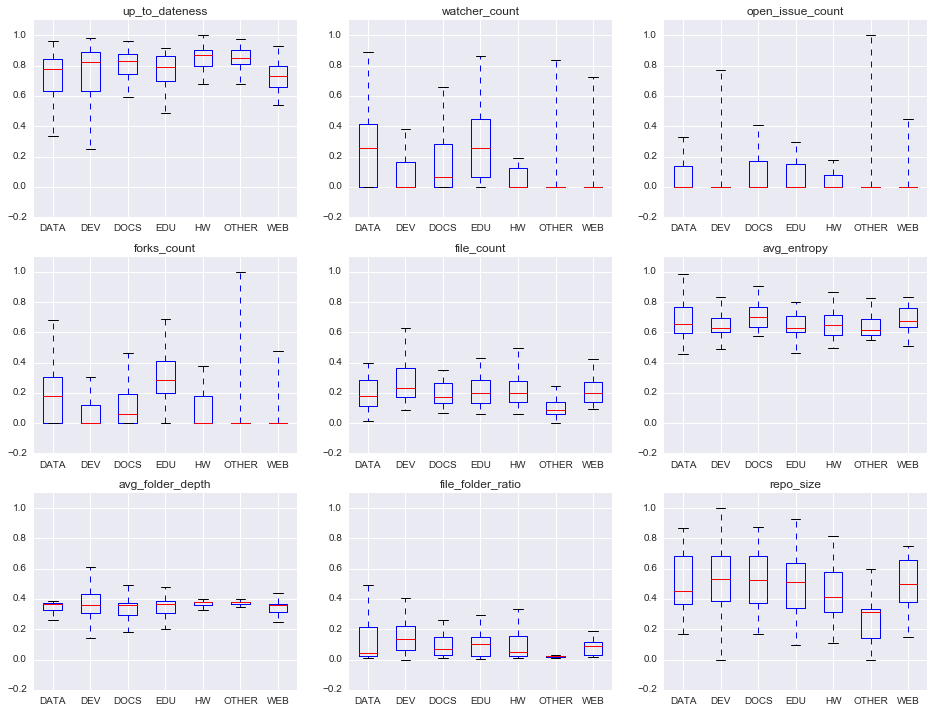

In [54]:
boxplots(norm_data)

## TSNE

In [9]:
import sklearn
import sklearn.manifold

In [43]:
categories = np.array(importer.trainset.classification + importer.testset.classification)
categories_nodev = categories[categories != 'DEV']
X = norm_data[categories != 'DEV']

{'DATA': 0, 'DOCS': 1, 'EDU': 2, 'HW': 3, 'OTHER': 4, 'WEB': 5}

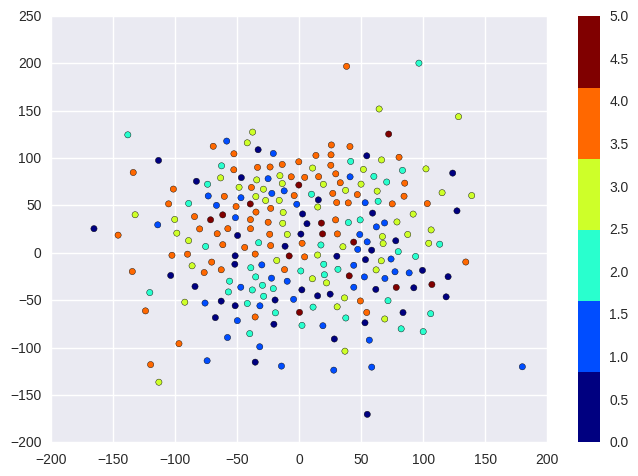

In [44]:
model = sklearn.manifold.TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
vis_data = model.fit_transform(X)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]


cats = np.unique(categories_nodev)
cat_translate = dict(zip(cats, np.arange(len(cats))))
    
color_mapping = [cat_translate[category] for category in categories_nodev]

plt.scatter(vis_x, vis_y, c=color_mapping, cmap=plt.cm.get_cmap("jet", len(cats)))
plt.colorbar()
cat_translate

In [11]:
t = np.ones((5, 6)) * np.arange(6)
t = t.flatten()
u = np.unique(t)
pos = np.argwhere(t == u[0]).transpose()[0]
t[pos]

array([ 0.,  0.,  0.,  0.,  0.])